In [1]:
from shapely.geometry import Point, Polygon
from shapely.ops import unary_union


In [2]:

# Lista de celdas (x_km, y_km)
celdas = [
    (12.5, 8.0),
    (15.0, 10.0),
    (13.5, 9.5)
]

radio_cobertura_km = 1.5  # cobertura de cada celda en kilómetros

# Crear polígonos circulares (coberturas)
coberturas = [Point(x, y).buffer(radio_cobertura_km) for x, y in celdas]

# Unión total de cobertura de red
cobertura_total = unary_union(coberturas)

# Rectángulo a analizar (x1, y1) esquina inferior izquierda, (x2, y2) esquina superior derecha
x1, y1 = 11.0, 7.5
x2, y2 = 16.0, 11.0
rectangulo_objetivo = Polygon([
    (x1, y1),
    (x1, y2),
    (x2, y2),
    (x2, y1)
])

# Comprobaciones
total_cubierto = cobertura_total.contains(rectangulo_objetivo)
parcial_cubierto = cobertura_total.intersects(rectangulo_objetivo)

print("¿Rectángulo totalmente cubierto?", total_cubierto)
print("¿Rectángulo parcialmente cubierto?", parcial_cubierto)


¿Rectángulo totalmente cubierto? False
¿Rectángulo parcialmente cubierto? True


In [3]:
import matplotlib.pyplot as plt

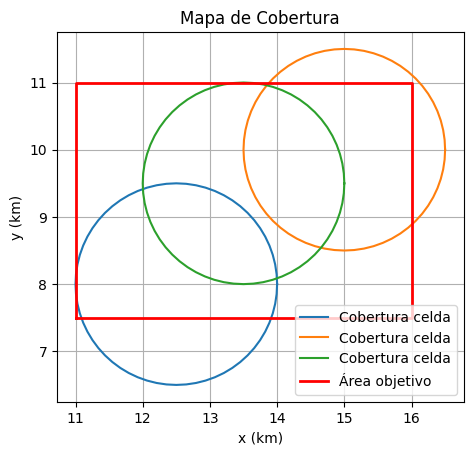

In [4]:
# Dibuja la cobertura y el rectángulo
fig, ax = plt.subplots()
for cobertura in coberturas:
    x, y = cobertura.exterior.xy
    ax.plot(x, y, label="Cobertura celda")

x, y = rectangulo_objetivo.exterior.xy
ax.plot(x, y, color='red', linewidth=2, label="Área objetivo")

ax.set_aspect('equal')
ax.legend()
plt.xlabel("x (km)")
plt.ylabel("y (km)")
plt.title("Mapa de Cobertura")
plt.grid(True)
plt.show()

In [5]:
# Calcular el porcentaje de cobertura (área cubierta / área total)
area_total = rectangulo_objetivo.area
area_cubierto = cobertura_total.intersection(rectangulo_objetivo).area
porcentaje_cobertura = (area_cubierto / area_total) * 100

print(f"Porcentaje de cobertura: {porcentaje_cobertura:.2f}%")


Porcentaje de cobertura: 74.46%
